In [53]:
%pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import tensorflow and print its version
import tensorflow as tf
print(tf.__version__)

2.19.0


In [3]:
import os  

In [4]:
os.path.join('data', 'healthy plants') 

'data\\healthy plants'

In [5]:
gpus=tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus:
 tf.config.experimental.set_memory_growth(gpu, True)  

In [6]:
import cv2 
import imghdr 
from matplotlib import pyplot as plt
data_dir = 'data'

C:\Users\chanp\AppData\Local\Temp\ipykernel_32576\4243309070.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
os.listdir(data_dir)

['healthy plants', 'unhealthy plants']

In [8]:
image_exts =[ 'jpg', 'jpeg', 'png', 'bmp']

In [9]:
image_exts[2]

'png'

In [10]:
img = cv2.imread(os.path.join('data', 'healthy plants', 'saple.jpg'))

In [11]:
img.shape


(200, 357, 3)

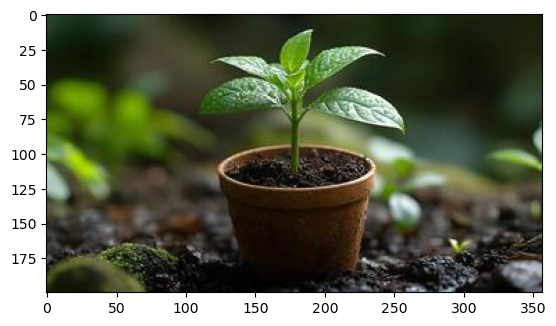

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
# image_paths = []
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_paths.append(os.path.join(data_dir, image_class, image))
        
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
         print('Error in image {}'.format(image_path))
       # os.remove(image_path) 



1.3 Load Data

In [14]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [15]:
import numpy as np
from matplotlib import pyplot as plt

## Loading and Exploring the Dataset

```python
# Load the dataset from the 'data' directory and automatically label images based on subdirectories

# Create an iterator to access batches of data

# Retrieve the next batch of images and labels

# Print the shape of the first batch (batch_size, height, width, channels)



In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1104 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch=data_iterator.next() 

In [19]:
batch[0].shape

(32, 256, 256, 3)

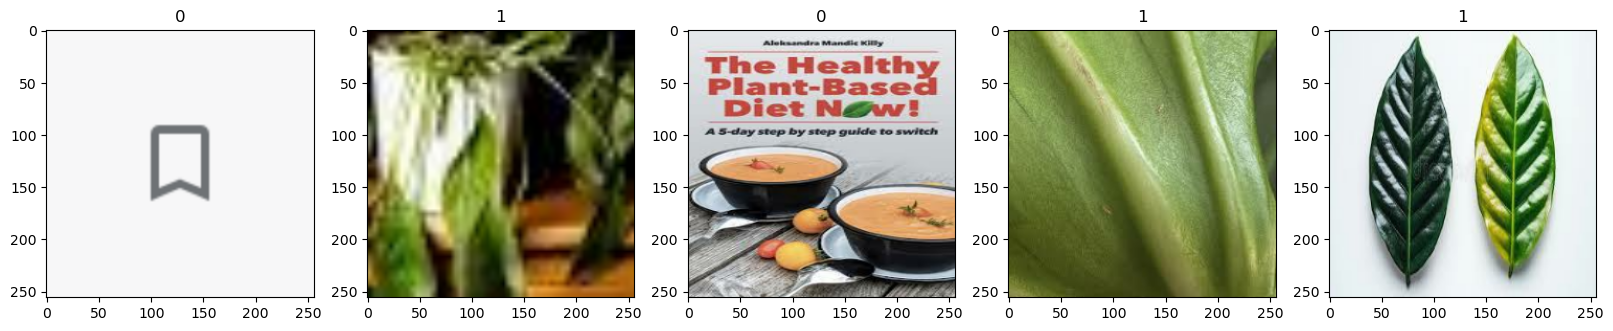

In [20]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


Normalize image pixel values to range [0,1] by dividing by 255

Check the maximum and minimum pixel values after scaling


In [21]:
scaled = batch[0] / 255
scaled.max(), scaled.min()

(1.0, 0.0)

2. Preprocess Data

2.1 Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

Retrieved a batch to check the maximum pixel value after normalization

In [23]:
data.as_numpy_iterator().next()[0].max()

1.0

2.2 Split data

In [24]:
len(data)

35

In [25]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

In [26]:
train_size, val_size, test_size

(28, 7, 0)

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

3. Deep Model

- sequential is a linear stack of layers to build the CNN model.
- Conv2D convolutional layer that applies filters to detech pattern like edges and textures.
- MaxPooling2D pooling layer that reduces spatial dimensions, keeping important features while reducing computation.
- Flatten converts the 2D feature maps into 1D vector before passing them to dense layer.
- Dense is a fully connected layer used for classification or decision-making in the network.
- Dropout drops random connections during training to prevent overfitting.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [29]:
model = Sequential() #model is initialized here

ReLU sets all negative values to **0** and keeps positive values unchanged, making the network more efficient and reducing the vanishing gradient problem.

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())   

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())    

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\chanp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary() # 254/2=`127` , 30*30*16=14400 converted 2d into single layer flatten and final dense layer 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [33]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.5255 - loss: 0.7522 - val_accuracy: 0.4808 - val_loss: 0.6838
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.5585 - loss: 0.6770 - val_accuracy: 0.5096 - val_loss: 0.6733
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.6169 - loss: 0.6688 - val_accuracy: 0.5817 - val_loss: 0.6634
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.6238 - loss: 0.6320 - val_accuracy: 0.6346 - val_loss: 0.6518
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.7039 - loss: 0.5832 - val_accuracy: 0.7163 - val_loss: 0.5729
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.7486 - loss: 0.5356 - val_accuracy: 0.7212 - val_loss: 0.5724
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.8083 - loss: 0.4771 - val_accuracy: 0.7837 - val_loss: 0.4494
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.8567 - loss: 0.3649 - val_accuracy: 0.

3.3 Plot Performance

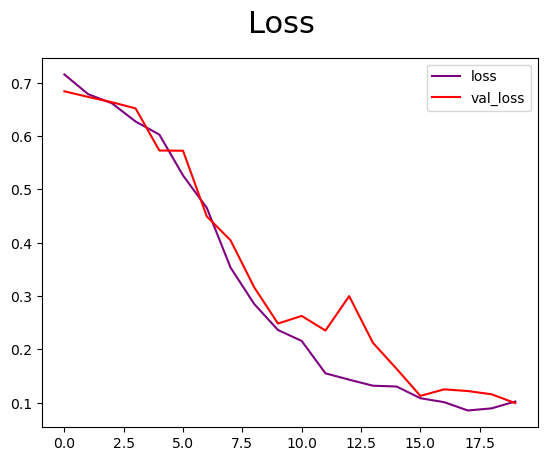

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='purple', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=22)
plt.legend(loc="upper right")
plt.show()

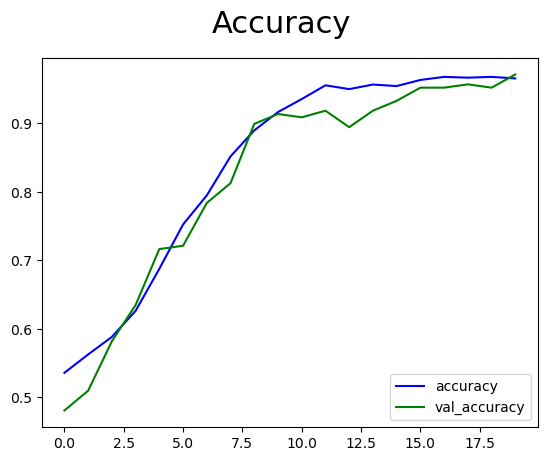

In [36]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')  
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=22)
plt.legend(loc="lower right")
plt.show()

Evaluating the Model

4.1 Evaluate

In [37]:
from tensorflow.keras.metrics import Precision , Recall, BinaryAccuracy

In [38]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()


In [39]:
len(test)

0

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

In [41]:
print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


4.2 Test

In [42]:
import cv2

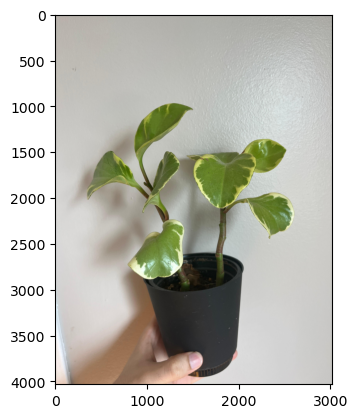

In [54]:
img =cv2.imread('2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

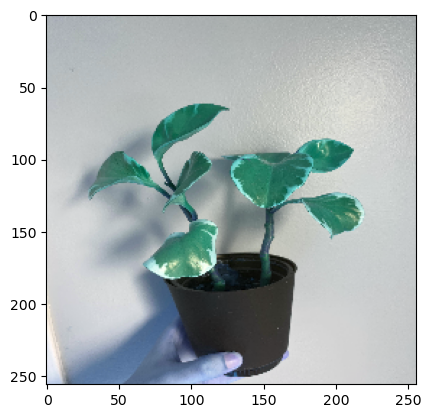

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
plant = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [57]:
plant

array([[0.12321206]], dtype=float32)

In [58]:
if plant > 0.5:
    print('Plant is sick')
else:
    print('Plant is healthy')

Plant is healthy


5. Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models', 'planthealthmodel.h5'))

In [50]:
plant_model = load_model(os.path.join('models', 'happysadmodel.h5'))  

In [51]:
plantnew = plant_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [52]:
if plantnew > 0.5:
    print('Plant is sick')
else:
    print('Plant is healthy')

Plant is healthy
